In [20]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

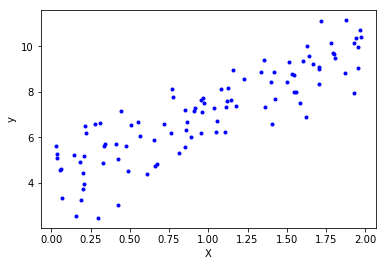

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [22]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [23]:
theta_best

array([[ 4.19543889],
       [ 2.9228728 ]])

In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.19543889],
       [ 10.04118448]])

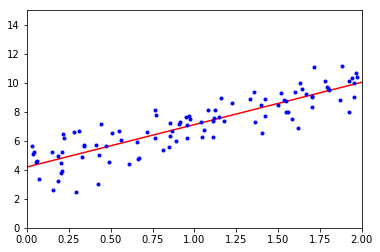

In [25]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [28]:
# With sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([ 4.19543889]), array([[ 2.9228728]]))

In [29]:
lin_reg.predict(X_new)

array([[  4.19543889],
       [ 10.04118448]])

In [30]:
# basic gradient descent 

eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 4.19543889],
       [ 2.9228728 ]])

In [31]:
# stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t1 + t)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx + 1]
        yi = y[random_idx:random_idx + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[ 4.18523678],
       [ 2.91955058]])

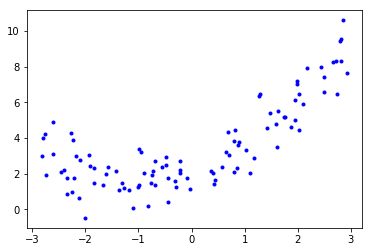

In [34]:
# non-linear data

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.74554055])

In [36]:
X_poly[0]

array([-0.74554055,  0.5558307 ])

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.0848127]), array([[ 0.97710012,  0.49087246]]))

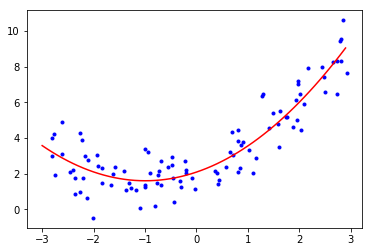

In [55]:
plt.plot(X, y, 'b.')
[[a, b]] = lin_reg.coef_

X_pred = np.arange(-3, 3, .1)
y_pred = b * X_pred ** 2 + a * X_pred + lin_reg.intercept_[0]
plt.plot(X_pred, y_pred, 'r-')
plt.show()


In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    axes = plt.gca()
    axes.set_ylim([0, 5])

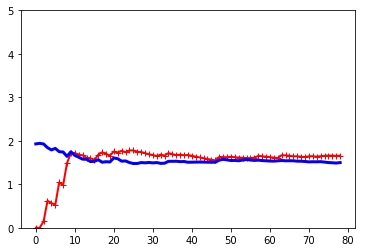

In [65]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

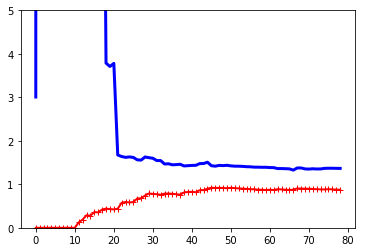

In [66]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

In [67]:
# Ridge Regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.05342069]])

In [73]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

[  1.93594992   5.00793926   6.45156381   2.34130416   5.91422614
   5.53242393   7.0431615    3.30974689   2.69741094   1.0820336
   4.79528323   1.37687845   6.49182685   8.3023427    2.06727086
   1.40732811   2.30738958   3.81326499   1.98612358   2.06893727   1.77849
   1.22476322   4.54917655   1.15050254   3.39278478   6.46858057
   2.49162659   2.04054713   8.23918928   1.56467839   5.41197967
   2.17863012   2.86074763   2.04252526   2.03217008   4.63889053
   7.40365092   1.48035315   7.93864607   2.39989638   4.2996036
   4.44665162   4.42971765   5.16444944   9.44516925   4.87740577
   3.19927849   1.46629121   8.00219692   6.33581936   0.99510565
   6.12789891   2.16140843   7.19374783   3.60350467   1.61772987
   2.9419176    3.21788588   1.45992051   0.86103907   0.42981972
   7.63561233   3.75744666   6.56579022   3.09701384   2.71737272
   1.17463089   2.35763911   2.77903584   3.04929326  10.60463296
   1.24580391   2.16161522   1.7606585    4.02253279   5.19491614
  

In [76]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.00709379])

In [77]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 5.00755268])

In [85]:
# early stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

sgd_reg_regression = Pipeline((
    ("std_scale", StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005))
))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg_regression.fit(X_train, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=True)

In [86]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [87]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [89]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

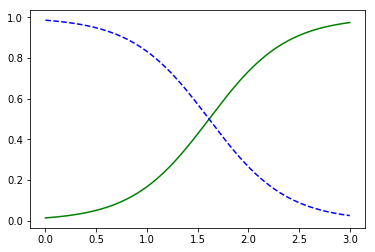

In [93]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')

In [94]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

In [99]:
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5, 2]])

array([2])

In [100]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134076e-07,   5.75276067e-02,   9.42471760e-01]])